<a href="https://colab.research.google.com/github/leaderman77/UK-Property-Data-Analysis/blob/main/UK_Property_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

Loading data using chunks

In [ ]:
def read_csv_in_chunks(file_path, chunk_size):
    # Initialize progress bar within the function to encapsulate functionality
    total_rows = 29212384
    progress = tqdm(total=total_rows, desc="Processing Rows")

    # Use a list to gather DataFrame chunks
    chunks = []
    start_time = time.time()

    # Read CSV in chunks and append each chunk to the list
    for chunk in pd.read_csv(file_path, chunksize=chunk_size, header=None):
        chunks.append(chunk)
        progress.update(len(chunk))  # Update the progress bar with the number of rows in the chunk

    # Concatenate all chunks at once
    df = pd.concat(chunks, ignore_index=True)
    progress.close()

    # Timing and status update
    total_time = time.time() - start_time
    print(f"Total time taken: {total_time:.2f} seconds")
    print("Data loading complete!")

    return df

#Configuration
file_path = 'Downloads/pp-complete.csv'
chunk_size = 500000
df = read_csv_in_chunks(file_path, chunk_size)

Processing Rows: 100%|█████████████████████████████████████████████████| 29212384/29212384 [04:19<00:00, 112561.54it/s]


Total time taken: 259.52 seconds
Data loading complete!


Check data

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,{109BBF80-1E51-4910-8E2C-B124E1117A7A},34950,1995-06-09 00:00,BA3 3AH,F,N,L,COOMBEND HOUSE,7,COOMBEND,RADSTOCK,RADSTOCK,WANSDYKE,AVON,A,A
1,{D5233D67-2975-426B-B98D-B124E39331D9},133000,1995-06-19 00:00,SW18 5AG,T,N,F,142,NaN,ASTONVILLE STREET,LONDON,LONDON,WANDSWORTH,GREATER LONDON,A,A
2,{718BD35C-25E1-431C-8AF7-B124E63ED4E1},83000,1995-08-21 00:00,IP11 7PU,D,N,F,3,NaN,GARFIELD ROAD,FELIXSTOWE,FELIXSTOWE,SUFFOLK COASTAL,SUFFOLK,A,A
3,{E127F626-6247-4D95-A392-B124F4C0A558},59000,1995-07-27 00:00,PE21 0SF,D,Y,F,BEAUCADRE,NaN,GAYSFIELD ROAD,FISHTOFT,BOSTON,BOSTON,LINCOLNSHIRE,A,A
4,{B10762A0-2C9C-4C82-A885-B1250B55FFF9},51000,1995-02-28 00:00,ME7 4DF,T,N,F,41,NaN,FRANKLIN ROAD,GILLINGHAM,GILLINGHAM,GILLINGHAM,KENT,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29212379,{152AB734-8318-E651-E063-4704A8C061D9},85000,2024-03-05 00:00,OL10 2AE,F,N,L,BIWATER HOUSE,APARTMENT 47,GREGGE STREET,NaN,HEYWOOD,ROCHDALE,GREATER MANCHESTER,B,A
29212380,{152AB734-831A-E651-E063-4704A8C061D9},60000,2024-03-13 00:00,BL1 1AU,F,N,L,HUNTINGDON HOUSE,APARTMENT 13,PRINCESS STREET,NaN,BOLTON,BOLTON,GREATER MANCHESTER,B,A
29212381,{152AB734-831C-E651-E063-4704A8C061D9},270000,2024-03-08 00:00,WN7 4BJ,D,N,F,21,NaN,WILKINSON PARK DRIVE,NaN,LEIGH,WIGAN,GREATER MANCHESTER,B,A
29212382,{152AB734-831F-E651-E063-4704A8C061D9},160000,2024-03-18 00:00,WN6 0HF,T,N,F,44,NaN,HIGH STREET,STANDISH,WIGAN,WIGAN,GREATER MANCHESTER,B,A


In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [ ]:
import psutil
import os

process = psutil.Process(os.getpid())
print(f"Memory Usage: {process.memory_info().rss / 1024 ** 2:.2f} MB")  # memory use in MB

Memory Usage: 9319.70 MB


In [ ]:
df.shape

(29212384, 16)

Provide column names

In [ ]:
df.columns = ['code', 'price', 'date',
              'postcode', 'column5', 'is_new_build',
              'column7', 'building_name','building_number',
              'street','locality', 'town',
              'district', 'county','column15', 'column16',]


df.columns

Index(['code', 'price', 'date', 'postcode', 'column5', 'is_new_build',
       'column7', 'building_name', 'building_number', 'street', 'locality',
       'town', 'district', 'county', 'column15', 'column16'],
      dtype='object')

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

code                      0
price                     0
date                      0
postcode              47285
column5                   0
is_new_build              0
column7                   0
building_name          4185
building_number    25748964
street               464236
locality           10664889
town                      0
district                  0
county                    0
column15                  0
column16                  0
dtype: int64

In [ ]:
(df.isnull().sum()/(len(df)))*100

0      0.000000
1      0.000000
2      0.000000
3      0.161866
4      0.000000
5      0.000000
6      0.000000
7      0.014326
8     88.144001
9      1.589175
10    36.508109
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
dtype: float64

In [ ]:
# Show all entries where at least one element is missing
rows_with_missing_values = df[df['postcode'].isnull()]
rows_with_missing_values

,code,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15,column16
2124,{14676B60-AE9D-49E5-9992-7B161D6E9A2E},10000,1995-02-13 00:00,NaN,T,N,F,13,NaN,MAIN STREET,CRUMLIN,NEWPORT,ISLWYN,GWENT,A,A
3783,{8E9EC4A0-D0DD-4707-8FD8-87474D269417},60000,1995-10-16 00:00,NaN,D,N,F,3,NaN,PILGRIMS LANE,CHILHAM,CANTERBURY,ASHFORD,KENT,A,A
4690,{CD151265-156D-4027-99D4-D1279340A42D},55000,1995-06-26 00:00,NaN,F,Y,L,AINSLEY COURT,3D,AINSLEY ROAD,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A
5898,{446B7AFE-36E0-4334-BB0B-B13CC10C5C9C},275000,1995-11-09 00:00,NaN,D,N,F,HARPS OAK,NaN,LONDON ROAD,REDHILL,REDHILL,REIGATE AND BANSTEAD,SURREY,A,A
5961,{3D54B2FB-700F-433E-B5A8-AA20F882D3F5},74500,1995-10-02 00:00,NaN,F,N,L,59,PART OF,PART OF,CHY HWEL,LONDON,CAMDEN,GREATER LONDON,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29211874,{152AB734-8500-E651-E063-4704A8C061D9},2600000,2024-01-05 00:00,NaN,O,N,F,ST THOMAS BECKETT SCHOOL,NaN,DOUGLAS DRIVE,NaN,WIRRAL,WIRRAL,MERSEYSIDE,B,A
29211895,{152AB734-8F42-E651-E063-4704A8C061D9},3106500,2024-02-08 00:00,NaN,O,N,F,ST MARTINS COURT,NaN,ROPES DRIVE,KESGRAVE,IPSWICH,EAST SUFFOLK,SUFFOLK,B,A
29211961,{152AB734-8155-E651-E063-4704A8C061D9},180000,2024-02-13 00:00,NaN,O,N,F,LAND ON THE SOUTH SIDE OF,NaN,BRIGG ROAD,SCOTTER,GAINSBOROUGH,WEST LINDSEY,LINCOLNSHIRE,B,A
29212159,{152AB734-905A-E651-E063-4704A8C061D9},400000,2024-02-23 00:00,NaN,O,N,F,POLLARDS YARD,NaN,MONMOUTH STREET,NaN,BRIDGWATER,SOMERSET,SOMERSET,B,A


In [ ]:
# Check for duplicates across the entire DataFrame
duplicates = df.duplicated()  # 'keep=False' marks all duplicates as True

# Count duplicate rows
duplicate_count = duplicates.sum()

print("Number of duplicate entries:", duplicate_count)

Number of duplicate entries: 0


In [ ]:
# Check for duplicates based on date, postcode, and property type
duplicates = df[df.duplicated(subset=['code'], keep=False)]

# Show the duplicates
duplicates

,code,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15,column16


In [ ]:
data = df.drop(columns=['code'])

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.dtypes

price                       int64
date               datetime64[ns]
postcode                   object
column5                    object
is_new_build               object
column7                    object
building_name              object
building_number            object
street                     object
locality                   object
town                       object
district                   object
county                     object
column15                   object
column16                   object
dtype: object

In [ ]:
data.describe()

,price,date
count,29212384.000,29212384
mean,224513.804,2009-02-20 08:44:32.004861440
min,1.000,1995-01-01 00:00:00
25%,85000.000,2001-11-15 00:00:00
50%,151000.000,2007-09-17 00:00:00
75%,250000.000,2016-11-08 00:00:00
max,900000000.000,2024-05-31 00:00:00
std,957734.651,NaN


In [ ]:
data['is_new_build'].describe()

count     29212384
unique           2
top              N
freq      26160457
Name: is_new_build, dtype: object

In [ ]:
# Replace 'Y' with 1 and 'N' with 0 in a specific column, e.g., 'column_name'
data['is_new_build'] = data['is_new_build'].replace({'Y': 1, 'N': 0})
data['is_new_build'] = data['is_new_build'].astype(int)

C:\Users\sardo\AppData\Local\Temp\ipykernel_10452\2576613588.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_new_build'] = data['is_new_build'].replace({'Y': 1, 'N': 0})


In [ ]:
data['column5'].unique()

array(['F', 'T', 'D', 'S', 'O'], dtype=object)

In [ ]:
data['column5'] = data['column5'].astype('category')

# Display the updated DataFrame or column to verify the change
print(data['column5'])
print(data['column5'].dtype)

0           F
1           T
2           D
3           D
4           T
           ..
29212379    F
29212380    F
29212381    D
29212382    T
29212383    S
Name: column5, Length: 29212384, dtype: category
Categories (5, object): ['D', 'F', 'O', 'S', 'T']
category


In [ ]:
data['column7'].unique()

array(['L', 'F', 'U'], dtype=object)

In [ ]:
data['column7'] = data['column7'].astype('category')

# Display the updated DataFrame or column to verify the change
print(data['column7'])
print(data['column7'].dtype)

0           L
1           F
2           F
3           F
4           F
           ..
29212379    L
29212380    L
29212381    F
29212382    F
29212383    F
Name: column7, Length: 29212384, dtype: category
Categories (3, object): ['F', 'L', 'U']
category


In [ ]:
data['column15'].unique()

array(['A', 'B'], dtype=object)

In [ ]:
data['column15'] = data['column15'].astype('category')

# Display the updated DataFrame or column to verify the change
print(data['column15'])
print(data['column15'].dtype)

0           A
1           A
2           A
3           A
4           A
           ..
29212379    B
29212380    B
29212381    B
29212382    B
29212383    B
Name: column15, Length: 29212384, dtype: category
Categories (2, object): ['A', 'B']
category


In [ ]:
data['column16'].unique()

array(['A'], dtype=object)

In [ ]:
data = data.drop(columns=['column16'])

In [ ]:
print(data.memory_usage(deep=True))

Index                     128
price               233699072
date                233699072
postcode           1880774529
column5              29212846
is_new_build        116849536
column7              29212666
building_name      1772596973
building_number    1043889365
street             2030735824
locality           1567859077
town               1919353043
district           1981630191
county             2015526977
column15             29212608
dtype: int64


In [ ]:
# Convert to int8
# data['is_new_build'] = data['is_new_build'].astype('int8')
# Convert to boolean
data['is_new_build'] = data['is_new_build'].astype(bool)

In [ ]:
data['is_new_build']

0           False
1           False
2           False
3            True
4           False
            ...  
29212379    False
29212380    False
29212381    False
29212382    False
29212383    False
Name: is_new_build, Length: 29212384, dtype: bool

In [ ]:
data.dtypes

price                       int64
date               datetime64[ns]
postcode                   object
column5                  category
is_new_build                 bool
column7                  category
building_name              object
building_number            object
street                     object
locality                   object
town                       object
district                   object
county                     object
column15                 category
dtype: object

In [ ]:
data.describe()

,price,date
count,2.921238e+07,29212384
mean,2.245138e+05,2009-02-20 08:44:32.004861440
min,1.000000e+00,1995-01-01 00:00:00
25%,8.500000e+04,2001-11-15 00:00:00
50%,1.510000e+05,2007-09-17 00:00:00
75%,2.500000e+05,2016-11-08 00:00:00
max,9.000000e+08,2024-05-31 00:00:00
std,9.577347e+05,NaN


Exercise 1: Identifying Potential Errors in the Land Registry Dataset

In [ ]:
errors = data[data['price'] <= 0]  # Prices should not be zero or negative
errors

,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15


In [ ]:
errors = pd.concat([errors, data[pd.to_datetime(data['date'], errors='coerce').isna()]])  # Invalid dates
errors

,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15


Identify potential price outliers

In [ ]:
# Filter out very low prices, e.g., below £1000
suspect_low_prices = data[data['price'] < 100]

# Filter out very high prices, e.g., top 0.01% of the transactions
high_price_threshold = data['price'].quantile(0.9999)
suspect_high_prices = data[data['price'] > high_price_threshold]

In [ ]:
suspect_low_prices

,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15
371785,49,1995-06-30,CO15 4XA,T,0,F,CONWAY UNITS,10,STEPHENSON ROAD,NaN,CLACTON-ON-SEA,TENDRING,ESSEX,A
685105,95,1995-06-21,NP19 0FY,S,0,F,41,NaN,CROMWELL ROAD,NaN,NEWPORT,NEWPORT,NEWPORT,A
685147,1,1995-01-12,TQ1 4BE,T,0,F,147,NaN,LYMINGTON ROAD,NaN,TORQUAY,TORBAY,TORBAY,A
842037,1,1996-04-15,SE14 5BA,T,0,F,134,NaN,NEW CROSS ROAD,NaN,LONDON,LEWISHAM,GREATER LONDON,A
1806156,1,1997-10-20,SW1X 8AU,T,0,L,72,NaN,EATON PLACE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A
3566368,1,1998-06-22,CW11 1GS,D,0,L,15,NaN,PENDA WAY,NaN,SANDBACH,CHESHIRE EAST,CHESHIRE EAST,A
3596629,95,1998-03-06,S17 4FG,S,0,F,2,NaN,MAIN AVENUE,TOTLEY RISE,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A
7135526,95,2001-06-15,OL8 1SH,T,0,F,57 - 59,NaN,FERN STREET,NaN,OLDHAM,OLDHAM,GREATER MANCHESTER,A
7207086,1,2001-11-23,NE63 8RS,T,0,F,79,NaN,STATION ROAD,NaN,ASHINGTON,NORTHUMBERLAND,NORTHUMBERLAND,A
21722839,1,2016-04-01,M6 5GY,T,0,F,551,NaN,LIVERPOOL STREET,NaN,SALFORD,SALFORD,GREATER MANCHESTER,A


In [ ]:
suspect_high_prices

,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15
4624491,32477000,1999-02-26,SW1W 0NH,D,0,L,TERMINAL HOUSE,NaN,LOWER BELGRAVE STREET,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A
10991000,92555918,2004-03-29,OX16 0QW,O,0,F,8,NaN,CONWAY DRIVE,NaN,BANBURY,CHERWELL,OXFORDSHIRE,B
15515036,53803654,2008-11-03,NE66 5PT,O,0,F,9,NaN,NORTH TERRACE,CHATTON,ALNWICK,NORTHUMBERLAND,NORTHUMBERLAND,B
17000343,73206100,2011-11-30,TW9 4EZ,O,0,L,"AMELIA HOUSE, 2",FLAT 48,STRAND DRIVE,NaN,RICHMOND,RICHMOND UPON THAMES,GREATER LONDON,B
17619382,54959000,2012-03-26,SW10 9SU,S,0,F,20,NaN,THE BOLTONS,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29168164,37320000,2024-03-19,AL1 4SU,O,0,F,244,NaN,HATFIELD ROAD,NaN,ST ALBANS,ST ALBANS,HERTFORDSHIRE,B
29180908,30600000,2024-03-19,SN14 6UZ,O,0,F,WM MORRISON SUPERMARKETS,NaN,WEST CEPEN WAY,NaN,CHIPPENHAM,WILTSHIRE,WILTSHIRE,B
29196731,32280000,2024-03-19,CV3 2XA,O,0,F,WM MORRISON SUPERMARKETS PLC,NaN,SKIPWORTH ROAD,BINLEY,COVENTRY,COVENTRY,WEST MIDLANDS,B
29208749,47959540,2024-02-02,EC1N 8TE,O,0,F,"ARUNDEL HOUSE, 36 - 43",NaN,KIRBY STREET,NaN,LONDON,CAMDEN,GREATER LONDON,B


In [ ]:
# Identify potential price outliers using the IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)
outliers = df[~filter]

In [ ]:
outliers

,code,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15,column16
976,{BC408CFD-7E37-4562-B085-777B95266C25},674999,1995-07-26 00:00,SW3 3TY,T,True,L,1,NaN,BRITTEN STREET,LONDON,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A
1009,{A11069A1-82FA-4B2A-9094-873B1AA487D2},693000,1995-06-29 00:00,NW1 5HN,F,True,L,HARLEY HOUSE,FLAT 72,MARYLEBONE ROAD,LONDON,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A
1349,{8BDD974E-42D9-4338-89C0-73EA2805BB87},510500,1995-11-20 00:00,KT22 0UT,D,True,F,6,NaN,SPICERS FIELD,OXSHOTT,LEATHERHEAD,ELMBRIDGE,SURREY,A,A
1603,{A2CD637B-5774-406A-853A-AA0DF85EB7D3},615001,1995-05-03 00:00,NW8 6HG,S,True,L,24,NaN,NORFOLK ROAD,LONDON,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A
1726,{EB9ABB76-3534-4E99-9028-7EA26A18600B},850000,1995-09-27 00:00,SW11 4PH,D,True,F,83,NaN,ALBERT BRIDGE ROAD,NaN,LONDON,WANDSWORTH,GREATER LONDON,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29212312,{152AB734-90FE-E651-E063-4704A8C061D9},3750000,2024-01-12 00:00,KT20 6NR,D,True,F,SMUGGLERS RIDGE,NaN,EYHURST CLOSE,KINGSWOOD,TADWORTH,REIGATE AND BANSTEAD,SURREY,B,A
29212313,{152AB734-9102-E651-E063-4704A8C061D9},1100000,2024-01-18 00:00,CR0 3HE,T,True,F,154,NaN,CANTERBURY ROAD,NaN,CROYDON,CROYDON,GREATER LONDON,B,A
29212315,{152AB734-9105-E651-E063-4704A8C061D9},700000,2024-03-05 00:00,RH6 0ES,O,True,F,WELLPOOLS FARM,NaN,STAN HILL,CHARLWOOD,HORLEY,MOLE VALLEY,SURREY,B,A
29212318,{152AB734-910C-E651-E063-4704A8C061D9},885060,2024-02-23 00:00,KT15 2DA,D,True,F,"CLADEN HOUSE, 145",NaN,NEW HAW ROAD,NaN,ADDLESTONE,RUNNYMEDE,SURREY,B,A


In [ ]:
min_prices = data[data['price'] <= 30]
min_prices

,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15
685147,1,1995-01-12,TQ1 4BE,T,0,F,147,NaN,LYMINGTON ROAD,NaN,TORQUAY,TORBAY,TORBAY,A
842037,1,1996-04-15,SE14 5BA,T,0,F,134,NaN,NEW CROSS ROAD,NaN,LONDON,LEWISHAM,GREATER LONDON,A
1806156,1,1997-10-20,SW1X 8AU,T,0,L,72,NaN,EATON PLACE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A
3566368,1,1998-06-22,CW11 1GS,D,0,L,15,NaN,PENDA WAY,NaN,SANDBACH,CHESHIRE EAST,CHESHIRE EAST,A
7207086,1,2001-11-23,NE63 8RS,T,0,F,79,NaN,STATION ROAD,NaN,ASHINGTON,NORTHUMBERLAND,NORTHUMBERLAND,A
21722839,1,2016-04-01,M6 5GY,T,0,F,551,NaN,LIVERPOOL STREET,NaN,SALFORD,SALFORD,GREATER MANCHESTER,A
25765768,1,2020-01-21,BR5 2EY,F,0,L,59,NaN,CRAY VALLEY ROAD,NaN,ORPINGTON,BROMLEY,GREATER LONDON,A
26340937,1,2021-09-13,SN4 0FJ,T,0,F,34,NaN,LORDS CLOSE,WROUGHTON,SWINDON,SWINDON,SWINDON,A
27948873,1,2022-07-04,WS12 2ER,T,0,F,117,NaN,BANK STREET,NaN,CANNOCK,CANNOCK CHASE,STAFFORDSHIRE,A
28093443,1,2022-09-30,SS7 5EJ,T,0,F,22,NaN,PEREGRINE DRIVE,NaN,BENFLEET,CASTLE POINT,ESSEX,A


Exercise 2: Complete the following table by calculating the number of sales and average sale price for all London Boroughs in 2023:

In [ ]:
# Filter to find unique London boroughs
london_boroughs_list = data[data['county'] == 'GREATER LONDON']['district'].unique().tolist()

In [ ]:
london_boroughs_list

['WANDSWORTH',
 'HAMMERSMITH AND FULHAM',
 'LAMBETH',
 'GREENWICH',
 'TOWER HAMLETS',
 'BEXLEY',
 'WALTHAM FOREST',
 'EALING',
 'CITY OF WESTMINSTER',
 'KINGSTON UPON THAMES',
 'REDBRIDGE',
 'ENFIELD',
 'SOUTHWARK',
 'BARNET',
 'ISLINGTON',
 'HILLINGDON',
 'SUTTON',
 'HACKNEY',
 'RICHMOND UPON THAMES',
 'HAVERING',
 'BROMLEY',
 'MERTON',
 'CROYDON',
 'HOUNSLOW',
 'LEWISHAM',
 'KENSINGTON AND CHELSEA',
 'BRENT',
 'CAMDEN',
 'NEWHAM',
 'HARINGEY',
 'HARROW',
 'BARKING AND DAGENHAM',
 'CITY OF LONDON']

In [ ]:
# Number of boroughs in the London boroughs list
number_of_boroughs = len(london_boroughs_list)
print("Number of London Boroughs:", number_of_boroughs)

Number of London Boroughs: 33


In [ ]:
# # Reset the index to make it a regular column
data = data.reset_index()

In [ ]:
# Filter the data for 2023 and for London boroughs
df_2023 = data[(data['date'].dt.year == 2023) & (data['district'].isin(london_boroughs_list))]
df_2023

,index,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15
28387909,28387909,970000,2023-05-26,RM2 6NH,D,False,F,67,NaN,LINKS AVENUE,NaN,ROMFORD,HAVERING,GREATER LONDON,A
28387934,28387934,390000,2023-05-31,RM10 7LH,T,False,F,127,NaN,MARSTON AVENUE,NaN,DAGENHAM,BARKING AND DAGENHAM,GREATER LONDON,A
28387935,28387935,678000,2023-05-26,RM14 2DD,S,False,F,6,NaN,FOXHALL ROAD,NaN,UPMINSTER,HAVERING,GREATER LONDON,A
28387969,28387969,1195000,2023-03-31,E4 9RH,D,False,F,18,NaN,FOREST GLADE,CHINGFORD,LONDON,WALTHAM FOREST,GREATER LONDON,A
28387970,28387970,430000,2023-05-11,RM8 2EA,S,False,F,21,NaN,MAYESBROOK ROAD,NaN,DAGENHAM,BARKING AND DAGENHAM,GREATER LONDON,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095904,29095904,110000,2023-12-11,N4 2JP,F,False,L,BANKSIDE APARTMENTS,FLAT 28,COSTER AVENUE,NaN,LONDON,HACKNEY,GREATER LONDON,A
29095905,29095905,572500,2023-12-19,N19 5SH,F,False,L,9A,NaN,HARGRAVE ROAD,NaN,LONDON,ISLINGTON,GREATER LONDON,A
29095906,29095906,252000,2023-10-27,HA0 1RQ,F,False,L,COSGROVE HOUSE,FLAT 76,HATTON ROAD,NaN,WEMBLEY,BRENT,GREATER LONDON,A
29095907,29095907,549950,2023-01-19,NW10 2EF,F,False,L,15,NaN,NEWMAN CLOSE,NaN,LONDON,BRENT,GREATER LONDON,A


In [ ]:
# Calculate the count of sales and average sale price
summary = df_2023.groupby('district').agg(
    count_of_sales=('index', 'count'),
    average_sale_price=('price', 'mean')
)
summary

,count_of_sales,average_sale_price
district,,
BARKING AND DAGENHAM,1355,3.971194e+05
BARNET,3222,8.092646e+05
BEXLEY,2543,4.327610e+05
BRENT,1864,6.781219e+05
BROMLEY,3741,6.034416e+05
CAMDEN,1926,1.498986e+06
CITY OF LONDON,202,4.399887e+06
CITY OF WESTMINSTER,2648,2.360142e+06
CROYDON,3709,4.813837e+05


In [ ]:
summary = summary.reset_index()

# Rename columns in the summary DataFrame
summary = summary.rename(columns={
    'district': 'London Borough',
    'count_of_sales': 'Count of Sales in 2023',
    'average_sale_price': 'Average Sale Price in 2023'
})
summary

,index,London Borough,Count of Sales in 2023,Average Sale Price in 2023
0,0,BARKING AND DAGENHAM,1355,397119.429
1,1,BARNET,3222,809264.563
2,2,BEXLEY,2543,432760.969
3,3,BRENT,1864,678121.948
4,4,BROMLEY,3741,603441.565
5,5,CAMDEN,1926,1498985.589
6,6,CITY OF LONDON,202,4399887.203
7,7,CITY OF WESTMINSTER,2648,2360142.435
8,8,CROYDON,3709,481383.664
9,9,EALING,2808,733167.982


Exercise 3: Count the number of new build Flats sold in each UK region since the start of 2020

In [ ]:
data['is_new_build'].describe()

count   29212384.000
mean           0.104
std            0.306
min            0.000
25%            0.000
50%            0.000
75%            0.000
max            1.000
Name: is_new_build, dtype: float64

In [ ]:
data.head()

,index,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15
0,0,34950,1995-06-09,BA3 3AH,F,0,L,COOMBEND HOUSE,7,COOMBEND,RADSTOCK,RADSTOCK,WANSDYKE,AVON,A
1,1,133000,1995-06-19,SW18 5AG,T,0,F,142,NaN,ASTONVILLE STREET,LONDON,LONDON,WANDSWORTH,GREATER LONDON,A
2,2,83000,1995-08-21,IP11 7PU,D,0,F,3,NaN,GARFIELD ROAD,FELIXSTOWE,FELIXSTOWE,SUFFOLK COASTAL,SUFFOLK,A
3,3,59000,1995-07-27,PE21 0SF,D,1,F,BEAUCADRE,NaN,GAYSFIELD ROAD,FISHTOFT,BOSTON,BOSTON,LINCOLNSHIRE,A
4,4,51000,1995-02-28,ME7 4DF,T,0,F,41,NaN,FRANKLIN ROAD,GILLINGHAM,GILLINGHAM,GILLINGHAM,KENT,A


In [ ]:
# Load region codes to names mapping
region_mapping = {
        'E12000001': 'North East',
        'E12000002': 'North West',
        'E12000003': 'Yorkshire and The Humber',
        'E12000004': 'East Midlands',
        'E12000005': 'West Midlands',
        'E12000006': 'East of England',
        'E12000007': 'London',
        'E12000008': 'South East',
        'E12000009': 'South West',
        'W99999999': '(pseudo) Wales',
        'S99999999': '(pseudo) Scotland',
        'N99999999': '(pseudo) Northern Ireland',
        'L99999999': '(pseudo) Channel Islands',
        'M99999999': '(pseudo) Isle of Man',
}

In [ ]:
# Load specific columns
postcode_data = pd.read_csv('Downloads/NSPL21_MAY_2024_UK.csv', usecols=['pcd', 'rgn'])
postcode_data

,pcd,rgn
0,AB1 0AA,S99999999
1,AB1 0AB,S99999999
2,AB1 0AD,S99999999
3,AB1 0AE,S99999999
4,AB1 0AF,S99999999
...,...,...
2703775,ZE3 9JW,S99999999
2703776,ZE3 9JX,S99999999
2703777,ZE3 9JY,S99999999
2703778,ZE3 9JZ,S99999999


In [ ]:
postcode_data.isnull().sum()

pcd        0
rgn    10959
dtype: int64

In [ ]:
postcode_data['pcd'].nunique()

2703780

In [ ]:
# postcode_data['cty'] = postcode_data['cty'].astype('category')
postcode_data['rgn'] = postcode_data['rgn'].astype('category')

In [ ]:
data['county'].nunique()

132

New build Flats sold in each UK region since the start of 2020

In [ ]:
df_new_builds = data[(data['is_new_build'] == 1) & (data['column7'] == 'F') & (data['date'].dt.year >= 2020)]
df_new_builds

,index,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15
25189525,25189525,135995,2020-01-31,TS6 0GA,T,True,F,123,NaN,MAPLEWOOD DRIVE,NaN,MIDDLESBROUGH,REDCAR AND CLEVELAND,REDCAR AND CLEVELAND,A
25189526,25189526,163995,2020-02-14,TS5 8DJ,S,True,F,69,NaN,STEIN GROVE,NaN,MIDDLESBROUGH,MIDDLESBROUGH,MIDDLESBROUGH,A
25189527,25189527,154995,2020-03-09,TS6 0GA,S,True,F,121,NaN,MAPLEWOOD DRIVE,NaN,MIDDLESBROUGH,REDCAR AND CLEVELAND,REDCAR AND CLEVELAND,A
25189528,25189528,210000,2020-03-05,TS16 0BF,T,True,F,12,NaN,THE OVAL,EAGLESCLIFFE,STOCKTON-ON-TEES,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A
25189529,25189529,142495,2020-02-28,TS6 0GA,S,True,F,119,NaN,MAPLEWOOD DRIVE,NaN,MIDDLESBROUGH,REDCAR AND CLEVELAND,REDCAR AND CLEVELAND,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29211428,29211428,230000,2024-01-26,WA12 8AW,T,True,F,54,NaN,DREWRY GROVE,NaN,NEWTON-LE-WILLOWS,ST HELENS,MERSEYSIDE,A
29211430,29211430,235000,2024-02-16,L37 6FE,S,True,F,14,NaN,CHATTERING DRIVE,FORMBY,LIVERPOOL,SEFTON,MERSEYSIDE,A
29211718,29211718,173796,2024-02-22,PR26 7BD,S,True,F,3,NaN,CONSTRUCTOR CLOSE,NaN,LEYLAND,SOUTH RIBBLE,LANCASHIRE,B
29211969,29211969,145690,2024-01-30,LN11 0FJ,S,True,F,15,NaN,BLUEBELL LANE,NaN,LOUTH,EAST LINDSEY,LINCOLNSHIRE,B


In [ ]:
postcode_df = postcode_data.drop_duplicates()

In [ ]:
postcode_df

,pcd,rgn
0,AB1 0AA,S99999999
1,AB1 0AB,S99999999
2,AB1 0AD,S99999999
3,AB1 0AE,S99999999
4,AB1 0AF,S99999999
...,...,...
2703775,ZE3 9JW,S99999999
2703776,ZE3 9JX,S99999999
2703777,ZE3 9JY,S99999999
2703778,ZE3 9JZ,S99999999


In [ ]:
# postcode_df.drop(columns=['pcd'], inplace=True)
# postcode_df

In [ ]:
# postcode_data['pcd_prefix'].nunique()

In [ ]:
postcode_data['rgn'].nunique()

14

In [ ]:
postcode_df['rgn'].nunique()

14

In [ ]:
postcode_df

,pcd,rgn
0,AB1 0AA,S99999999
1,AB1 0AB,S99999999
2,AB1 0AD,S99999999
3,AB1 0AE,S99999999
4,AB1 0AF,S99999999
...,...,...
2703775,ZE3 9JW,S99999999
2703776,ZE3 9JX,S99999999
2703777,ZE3 9JY,S99999999
2703778,ZE3 9JZ,S99999999


In [ ]:
# Merge on postcode
df_new_builds = df_new_builds.merge(postcode_df, left_on='postcode', right_on='pcd', how='left')
df_new_builds

,index,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15,pcd,rgn
0,25189525,135995,2020-01-31,TS6 0GA,T,1,F,123,NaN,MAPLEWOOD DRIVE,NaN,MIDDLESBROUGH,REDCAR AND CLEVELAND,REDCAR AND CLEVELAND,A,TS6 0GA,E12000001
1,25189526,163995,2020-02-14,TS5 8DJ,S,1,F,69,NaN,STEIN GROVE,NaN,MIDDLESBROUGH,MIDDLESBROUGH,MIDDLESBROUGH,A,TS5 8DJ,E12000001
2,25189527,154995,2020-03-09,TS6 0GA,S,1,F,121,NaN,MAPLEWOOD DRIVE,NaN,MIDDLESBROUGH,REDCAR AND CLEVELAND,REDCAR AND CLEVELAND,A,TS6 0GA,E12000001
3,25189528,210000,2020-03-05,TS16 0BF,T,1,F,12,NaN,THE OVAL,EAGLESCLIFFE,STOCKTON-ON-TEES,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,NaN,NaN
4,25189529,142495,2020-02-28,TS6 0GA,S,1,F,119,NaN,MAPLEWOOD DRIVE,NaN,MIDDLESBROUGH,REDCAR AND CLEVELAND,REDCAR AND CLEVELAND,A,TS6 0GA,E12000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279776,29211428,230000,2024-01-26,WA12 8AW,T,1,F,54,NaN,DREWRY GROVE,NaN,NEWTON-LE-WILLOWS,ST HELENS,MERSEYSIDE,A,NaN,NaN
279777,29211430,235000,2024-02-16,L37 6FE,S,1,F,14,NaN,CHATTERING DRIVE,FORMBY,LIVERPOOL,SEFTON,MERSEYSIDE,A,L37 6FE,E12000002
279778,29211718,173796,2024-02-22,PR26 7BD,S,1,F,3,NaN,CONSTRUCTOR CLOSE,NaN,LEYLAND,SOUTH RIBBLE,LANCASHIRE,B,NaN,NaN
279779,29211969,145690,2024-01-30,LN11 0FJ,S,1,F,15,NaN,BLUEBELL LANE,NaN,LOUTH,EAST LINDSEY,LINCOLNSHIRE,B,NaN,NaN


In [ ]:
# Show all entries where at least one element is missing
rows_with_missing_values = df_new_builds[df_new_builds['rgn'].isnull()]
rows_with_missing_values

,index,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15,pcd,rgn
3,25189528,210000,2020-03-05,TS16 0BF,T,1,F,12,NaN,THE OVAL,EAGLESCLIFFE,STOCKTON-ON-TEES,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,NaN,NaN
5,25189530,195500,2020-03-26,TS25 3FA,D,1,F,8,NaN,ST TERESAS CLOSE,NaN,HARTLEPOOL,HARTLEPOOL,HARTLEPOOL,A,NaN,NaN
6,25189531,249995,2020-03-27,TS19 8GN,D,1,F,6,NaN,ARABLE ROAD,NaN,STOCKTON-ON-TEES,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,NaN,NaN
8,25189533,249995,2020-03-27,TS19 8FT,D,1,F,6,NaN,SUMMERVILLE AVENUE,NaN,STOCKTON-ON-TEES,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,NaN,NaN
11,25189536,239995,2020-03-27,TS19 8GQ,D,1,F,6,NaN,HARVEST DRIVE,NaN,STOCKTON-ON-TEES,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279769,29210678,270000,2024-01-26,LS15 8GZ,S,1,F,34,NaN,ASHBOURNE AVENUE,NaN,LEEDS,LEEDS,WEST YORKSHIRE,A,NaN,NaN
279772,29210681,280000,2024-02-19,LS15 8GZ,T,1,F,30,NaN,ASHBOURNE AVENUE,NaN,LEEDS,LEEDS,WEST YORKSHIRE,A,NaN,NaN
279776,29211428,230000,2024-01-26,WA12 8AW,T,1,F,54,NaN,DREWRY GROVE,NaN,NEWTON-LE-WILLOWS,ST HELENS,MERSEYSIDE,A,NaN,NaN
279778,29211718,173796,2024-02-22,PR26 7BD,S,1,F,3,NaN,CONSTRUCTOR CLOSE,NaN,LEYLAND,SOUTH RIBBLE,LANCASHIRE,B,NaN,NaN


In [ ]:
# Create a mapping from county to a non-null rgn value
rgn_mapping = df_new_builds.dropna(subset=['rgn']).drop_duplicates('county').set_index('county')['rgn'].to_dict()
rgn_mapping

{'REDCAR AND CLEVELAND': 'E12000001',
 'MIDDLESBROUGH': 'E12000001',
 'WEST MIDLANDS': 'E12000005',
 'MERSEYSIDE': 'E12000002',
 'CITY OF PETERBOROUGH': 'E12000006',
 'CAMBRIDGESHIRE': 'E12000006',
 'LANCASHIRE': 'E12000002',
 'BLACKBURN WITH DARWEN': 'E12000002',
 'LINCOLNSHIRE': 'E12000004',
 'LEICESTERSHIRE': 'E12000004',
 'GREATER MANCHESTER': 'E12000002',
 'ESSEX': 'E12000006',
 'NORFOLK': 'E12000006',
 'BLACKPOOL': 'E12000002',
 'LEICESTER': 'E12000004',
 'HALTON': 'E12000002',
 'CHESHIRE EAST': 'E12000002',
 'CHESHIRE WEST AND CHESTER': 'E12000002',
 'WARRINGTON': 'E12000002',
 'HAMPSHIRE': 'E12000008',
 'CUMBRIA': 'E12000002',
 'THE VALE OF GLAMORGAN': 'W99999999',
 'SWANSEA': 'W99999999',
 'CARDIFF': 'W99999999',
 'FLINTSHIRE': 'W99999999',
 'POWYS': 'W99999999',
 'MONMOUTHSHIRE': 'W99999999',
 'DORSET': 'E12000009',
 'DERBYSHIRE': 'E12000004',
 'DARLINGTON': 'E12000001',
 'COUNTY DURHAM': 'E12000001',
 'CORNWALL': 'E12000009',
 'NORTHAMPTONSHIRE': 'E12000004',
 'WORCESTERSHIR

In [ ]:
additional_mappings = {
    'STOCKTON-ON-TEES': 'E12000001',
    'HARTLEPOOL': 'E12000001',
    'ISLE OF WIGHT': 'E12000008',
    'THURROCK': 'E12000006',
    'NORTHUMBERLAND': 'E12000001',
    'CEREDIGION': 'W99999999',
    'PEMBROKESHIRE': 'W99999999',
    'GWYNEDD': 'W99999999',
    'ISLE OF ANGLESEY': 'W99999999',
    'DENBIGHSHIRE': 'W99999999',
    'CONWY': 'W99999999',
    'MERTHYR TYDFIL': 'W99999999',
    'BLAENAU GWENT': 'W99999999',
    'NEWPORT': 'W99999999',
    'BEDFORD': 'E12000006',
    'NORTH EAST LINCOLNSHIRE': 'E12000004',
    'YORK': 'E12000003',
    'SOUTHAMPTON': 'E12000008'
}
rgn_mapping.update(additional_mappings)

In [ ]:
# Fill NaN in rgn using the mapping based on county
df_new_builds['rgn'] = df_new_builds['rgn'].fillna(df_new_builds['county'].map(rgn_mapping))
df_new_builds

,index,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15,pcd,rgn
0,25189525,135995,2020-01-31,TS6 0GA,T,1,F,123,NaN,MAPLEWOOD DRIVE,NaN,MIDDLESBROUGH,REDCAR AND CLEVELAND,REDCAR AND CLEVELAND,A,TS6 0GA,E12000001
1,25189526,163995,2020-02-14,TS5 8DJ,S,1,F,69,NaN,STEIN GROVE,NaN,MIDDLESBROUGH,MIDDLESBROUGH,MIDDLESBROUGH,A,TS5 8DJ,E12000001
2,25189527,154995,2020-03-09,TS6 0GA,S,1,F,121,NaN,MAPLEWOOD DRIVE,NaN,MIDDLESBROUGH,REDCAR AND CLEVELAND,REDCAR AND CLEVELAND,A,TS6 0GA,E12000001
3,25189528,210000,2020-03-05,TS16 0BF,T,1,F,12,NaN,THE OVAL,EAGLESCLIFFE,STOCKTON-ON-TEES,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,NaN,E12000001
4,25189529,142495,2020-02-28,TS6 0GA,S,1,F,119,NaN,MAPLEWOOD DRIVE,NaN,MIDDLESBROUGH,REDCAR AND CLEVELAND,REDCAR AND CLEVELAND,A,TS6 0GA,E12000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279776,29211428,230000,2024-01-26,WA12 8AW,T,1,F,54,NaN,DREWRY GROVE,NaN,NEWTON-LE-WILLOWS,ST HELENS,MERSEYSIDE,A,NaN,E12000002
279777,29211430,235000,2024-02-16,L37 6FE,S,1,F,14,NaN,CHATTERING DRIVE,FORMBY,LIVERPOOL,SEFTON,MERSEYSIDE,A,L37 6FE,E12000002
279778,29211718,173796,2024-02-22,PR26 7BD,S,1,F,3,NaN,CONSTRUCTOR CLOSE,NaN,LEYLAND,SOUTH RIBBLE,LANCASHIRE,B,NaN,E12000002
279779,29211969,145690,2024-01-30,LN11 0FJ,S,1,F,15,NaN,BLUEBELL LANE,NaN,LOUTH,EAST LINDSEY,LINCOLNSHIRE,B,NaN,E12000004


In [ ]:
# Show all entries where at least one element is missing
rows_with_missing_values = df_new_builds[df_new_builds['rgn'].isnull()]
rows_with_missing_values

,index,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15,pcd,rgn


In [ ]:
df_new_builds.drop(columns=['pcd'], inplace=True)

In [ ]:
# Map the region codes to names
df_new_builds['region'] = df_new_builds['rgn'].map(region_mapping)

In [ ]:
df_new_builds['region'].isna().sum()

0

In [ ]:
df_new_builds['region'].describe()

count         279781
unique            10
top       South East
freq           47251
Name: region, dtype: object

In [ ]:
df_new_builds['is_new_build'].unique()

array([1])

In [ ]:
df_new_builds

,index,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15,rgn,region
0,25189525,135995,2020-01-31,TS6 0GA,T,1,F,123,NaN,MAPLEWOOD DRIVE,NaN,MIDDLESBROUGH,REDCAR AND CLEVELAND,REDCAR AND CLEVELAND,A,E12000001,North East
1,25189526,163995,2020-02-14,TS5 8DJ,S,1,F,69,NaN,STEIN GROVE,NaN,MIDDLESBROUGH,MIDDLESBROUGH,MIDDLESBROUGH,A,E12000001,North East
2,25189527,154995,2020-03-09,TS6 0GA,S,1,F,121,NaN,MAPLEWOOD DRIVE,NaN,MIDDLESBROUGH,REDCAR AND CLEVELAND,REDCAR AND CLEVELAND,A,E12000001,North East
3,25189528,210000,2020-03-05,TS16 0BF,T,1,F,12,NaN,THE OVAL,EAGLESCLIFFE,STOCKTON-ON-TEES,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,E12000001,North East
4,25189529,142495,2020-02-28,TS6 0GA,S,1,F,119,NaN,MAPLEWOOD DRIVE,NaN,MIDDLESBROUGH,REDCAR AND CLEVELAND,REDCAR AND CLEVELAND,A,E12000001,North East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279776,29211428,230000,2024-01-26,WA12 8AW,T,1,F,54,NaN,DREWRY GROVE,NaN,NEWTON-LE-WILLOWS,ST HELENS,MERSEYSIDE,A,E12000002,North West
279777,29211430,235000,2024-02-16,L37 6FE,S,1,F,14,NaN,CHATTERING DRIVE,FORMBY,LIVERPOOL,SEFTON,MERSEYSIDE,A,E12000002,North West
279778,29211718,173796,2024-02-22,PR26 7BD,S,1,F,3,NaN,CONSTRUCTOR CLOSE,NaN,LEYLAND,SOUTH RIBBLE,LANCASHIRE,B,E12000002,North West
279779,29211969,145690,2024-01-30,LN11 0FJ,S,1,F,15,NaN,BLUEBELL LANE,NaN,LOUTH,EAST LINDSEY,LINCOLNSHIRE,B,E12000004,East Midlands


In [ ]:
new_builds_summary = df_new_builds.groupby('region').size()
new_builds_summary

C:\Users\sardo\AppData\Local\Temp\ipykernel_16516\2581765333.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_builds_summary = df_new_builds.groupby('region').size()


region
North East                   19668
North West                   35357
Yorkshire and The Humber     28009
East Midlands                38749
West Midlands                29463
East of England              37331
London                        2016
South East                   47251
South West                   30858
(pseudo) Channel Islands         0
(pseudo) Isle of Man             0
(pseudo) Northern Ireland        0
(pseudo) Scotland                0
(pseudo) Wales               11079
dtype: int64

Exercise 4. Plot the number of sales per week since the start of 2020 as a line chart

In [ ]:
# data['week'] = data['date'].dt.isocalendar().week
# df_weekly = data[data['date'].dt.year >= 2020].groupby('week').size()

# plt.figure(figsize=(12, 6))
# plt.plot(df_weekly.index, df_weekly.values)
# plt.title('Weekly Sales Since 2020')
# plt.xlabel('Week Number')
# plt.ylabel('Number of Sales')
# plt.show()

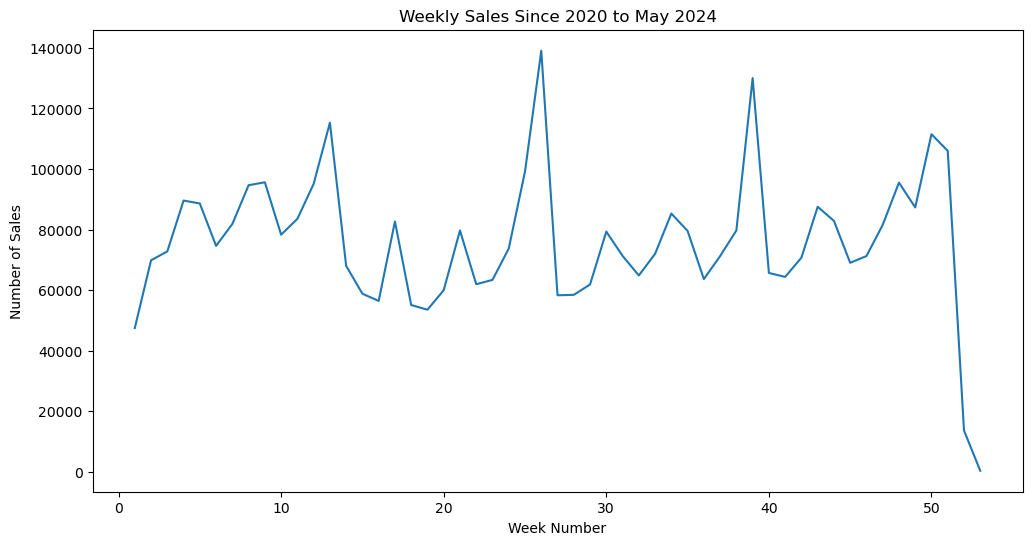

In [ ]:
data_2020 = data[data['date'].dt.year >= 2020].copy()
data_2020['week'] = data_2020['date'].dt.isocalendar().week

# Group data by week
df_weekly = data_2020.groupby('week').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly.values)
plt.title('Weekly Sales Since 2020 to May 2024')
plt.xlabel('Week Number')
plt.ylabel('Number of Sales')
plt.show()

In [ ]:
data_2020['week'].value_counts().sort_values()

week
53       410
52     13703
1      47520
19     53565
18     55109
16     56464
27     58326
28     58476
15     58837
20     60007
29     61888
22     61974
23     63415
36     63682
41     64395
32     64870
40     65700
14     68028
45     69059
2      69877
42     70748
37     71260
46     71271
31     71344
33     72007
3      72813
24     73760
6      74635
10     78332
30     79357
35     79575
21     79728
38     79740
47     81563
7      81873
17     82686
44     82894
11     83568
34     85310
49     87341
43     87550
5      88636
4      89602
8      94662
12     95097
48     95520
9      95629
25     99193
51    106002
50    111510
13    115313
39    130034
26    139065
Name: count, dtype: Int64

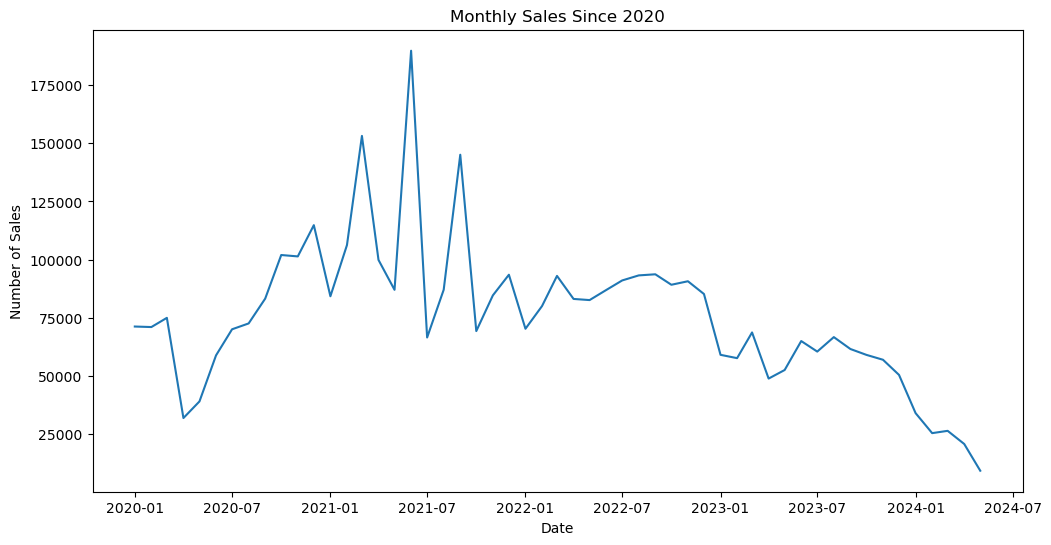

In [ ]:
import matplotlib.dates as mdates

# Group by month and year
data_2020['month_year'] = data_2020['date'].dt.to_period('M')
df_monthly = data_2020.groupby('month_year').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index.to_timestamp(), df_monthly.values)
plt.title('Monthly Sales Since 2020')
plt.xlabel('Date')
plt.ylabel('Number of Sales')

# Format the x-axis

plt.show()

In [ ]:
data_2020.describe()

,index,price,date
count,4022923.000,4022923.000,4022923
mean,27200922.000,391781.861,2021-12-23 14:24:22.877214720
min,25189461.000,1.000,2020-01-01 00:00:00
25%,26195191.500,170000.000,2021-02-10 00:00:00
50%,27200922.000,267000.000,2021-11-12 00:00:00
75%,28206652.500,412500.000,2022-10-31 00:00:00
max,29212383.000,900000000.000,2024-05-31 00:00:00
std,1161317.983,1687645.862,NaN


Exercise 5. Plot a histogram of sale prices and discuss which distribution best represents the data

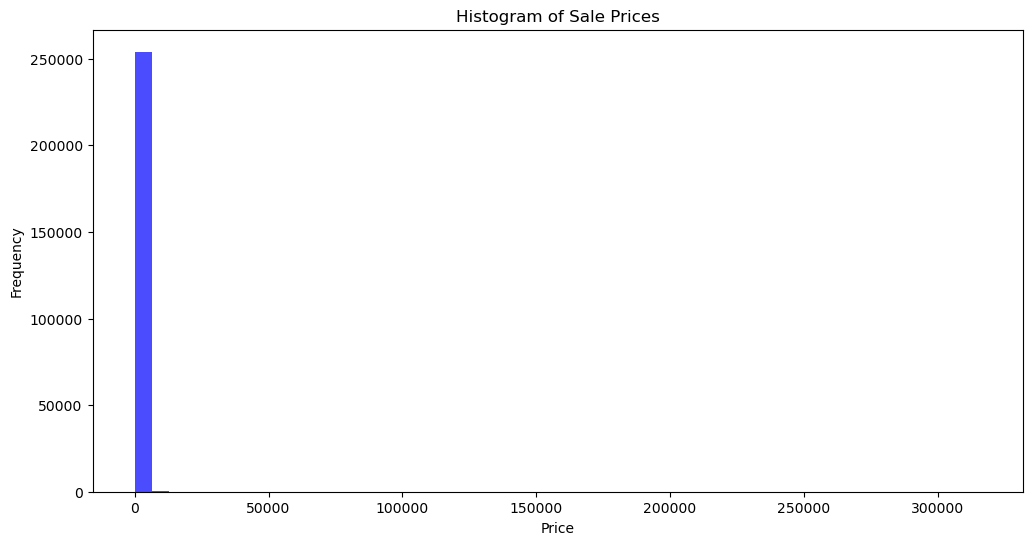

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['price'].value_counts(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Sale Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

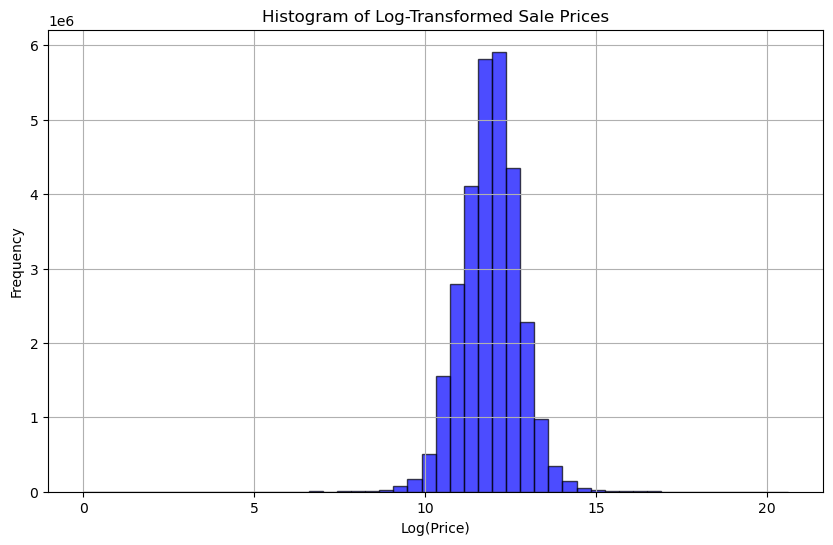

In [ ]:
# Log-transform the prices to reduce skewness
data['log_price'] = np.log(data['price'])

# Plotting the histogram of log-transformed prices
plt.figure(figsize=(10, 6))
plt.hist(data['log_price'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Log-Transformed Sale Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
data['price'].describe()

count    29212384.000
mean       224513.804
std        957734.651
min             1.000
25%         85000.000
50%        151000.000
75%        250000.000
max     900000000.000
Name: price, dtype: float64

Exercise 6. Using the BNG tiles and an appropriate scale, plot a map showing the number of sales per 10km grid square

In [ ]:
import geopandas as gpd

In [ ]:
# Correct path with double backslashes
grid = gpd.read_file('Downloads\\OSGB_Grids-master\\OSGB_Grids-master\\Shapefile\\OSGB_Grid_10km.shp')
grid.head()

,TILE_NAME,25K,ENGLAND,SCOTLAND,WALES,geometry
0,HP40,t,f,t,f,"POLYGON ((439999.999 1200000.003, 439999.999 1..."
1,HP50,t,f,t,f,"POLYGON ((449999.996 1200000.003, 449999.996 1..."
2,HP51,t,f,t,f,"POLYGON ((449999.996 1210000, 449999.996 12199..."
3,HP60,t,f,t,f,"POLYGON ((460000.002 1200000.003, 460000.002 1..."
4,HP61,t,f,t,f,"POLYGON ((460000.002 1210000, 460000.002 12199..."


In [ ]:
grid.head()

,TILE_NAME,25K,ENGLAND,SCOTLAND,WALES,geometry
0,HP40,t,f,t,f,"POLYGON ((439999.999 1200000.003, 439999.999 1210000, 449999.996 1210000, 449999.996 1200000.003, 439999.999 1200000.003))"
1,HP50,t,f,t,f,"POLYGON ((449999.996 1200000.003, 449999.996 1210000, 460000.002 1210000, 460000.002 1200000.003, 449999.996 1200000.003))"
2,HP51,t,f,t,f,"POLYGON ((449999.996 1210000, 449999.996 1219999.998, 460000.002 1219999.998, 460000.002 1210000, 449999.996 1210000))"
3,HP60,t,f,t,f,"POLYGON ((460000.002 1200000.003, 460000.002 1210000, 470000 1210000, 470000 1200000.003, 460000.002 1200000.003))"
4,HP61,t,f,t,f,"POLYGON ((460000.002 1210000, 460000.002 1219999.998, 470000 1219999.998, 470000 1210000, 460000.002 1210000))"


Load external source to extract long and lat coordinates by using postcode values

In [ ]:
def read_txt_in_chunks(file_path, chunk_size):
    # Initialize progress bar within the function to encapsulate functionality
    total_rows = 1817768  # Update this with the actual total number of rows if known
    progress = tqdm(total=total_rows, desc="Processing Rows")

    # Use a list to gather DataFrame chunks
    chunks = []
    start_time = time.time()

    # Read TXT in chunks and append each chunk to the list
    for chunk in pd.read_csv(file_path, sep="\t", chunksize=chunk_size, header=None):
        chunks.append(chunk)
        progress.update(len(chunk))  # Update the progress bar with the number of rows in the chunk

    # Concatenate all chunks at once
    df = pd.concat(chunks, ignore_index=True)
    progress.close()

    # Timing and status update
    total_time = time.time() - start_time
    print(f"Total time taken: {total_time:.2f} seconds")
    print("Data loading complete!")

    return df

# Configuration
file_path = 'Downloads/GB_full_csv/GB_full.txt'
chunk_size = 500000
df_postcode_cord = read_txt_in_chunks(file_path, chunk_size)

Processing Rows:  28%|██████████████▎                                     | 500000/1817768 [00:01<00:03, 375690.55it/s]C:\Users\sardo\AppData\Local\Temp\ipykernel_17608\2178161114.py:11: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep="\t", chunksize=chunk_size, header=None):
Processing Rows: 100%|███████████████████████████████████████████████████| 1817768/1817768 [00:03<00:00, 460171.62it/s]

Total time taken: 3.96 seconds
Data loading complete!


In [ ]:
df_postcode_cord.head()

,country_code,postcode,district,country,country_abr,county,column7,city,city_code,latitude,longitude,column8
0,GB,AL3 8QE,Slip End,England,ENG,Bedfordshire,NaN,Central Bedfordshire,E06000056,51.8479,-0.4474,6
1,GB,AL5 3NG,Harpenden,England,ENG,Bedfordshire,NaN,Central Bedfordshire,E06000056,51.8321,-0.3830,6
2,GB,AL5 3NS,Hyde,England,ENG,Bedfordshire,NaN,Central Bedfordshire,E06000056,51.8333,-0.3763,6
3,GB,AL5 3QF,Hyde,England,ENG,Bedfordshire,NaN,Central Bedfordshire,E06000056,51.8341,-0.3850,6
4,GB,B10 0AB,Birmingham,England,ENG,West Midlands,NaN,Birmingham District (B),E08000025,52.4706,-1.8750,6


In [ ]:
df_postcode_cord.columns = ['country_code', 'postcode', 'district',
              'country', 'country_abr', 'county',
              'column7', 'city','city_code',
              'latitude','longitude', 'column8']

df_postcode_cord.columns

Index(['country_code', 'postcode', 'district', 'country', 'country_abr',
       'county', 'column7', 'city', 'city_code', 'latitude', 'longitude',
       'column8'],
      dtype='object')

In [ ]:
df_postcode_cord_1 = df_postcode_cord.drop(columns=['country_code', 'district',
                                                  'country', 'country_abr', 'county',
                                                  'column7', 'city','city_code', 'column8'], axis=1)

In [ ]:
df_postcode_cord_1

,postcode,latitude,longitude
0,AL3 8QE,51.8479,-0.4474
1,AL5 3NG,51.8321,-0.3830
2,AL5 3NS,51.8333,-0.3763
3,AL5 3QF,51.8341,-0.3850
4,B10 0AB,52.4706,-1.8750
...,...,...,...
1817763,SY23 9FQ,52.4035,-4.0436
1817764,SY23 9FT,52.4035,-4.0436
1817765,SY23 9FW,52.4035,-4.0436
1817766,SY24 5WR,52.4035,-4.0436


In [ ]:
# # Merge on postcode
df_cord = data.merge(df_postcode_cord_1, left_on='postcode', right_on='postcode', how='left')
df_cord

,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15,latitude,longitude
0,34950,1995-06-09,BA3 3AH,F,0,L,COOMBEND HOUSE,7,COOMBEND,RADSTOCK,RADSTOCK,WANSDYKE,AVON,A,51.2941,-2.4488
1,133000,1995-06-19,SW18 5AG,T,0,F,142,NaN,ASTONVILLE STREET,LONDON,LONDON,WANDSWORTH,GREATER LONDON,A,51.4412,-0.1984
2,83000,1995-08-21,IP11 7PU,D,0,F,3,NaN,GARFIELD ROAD,FELIXSTOWE,FELIXSTOWE,SUFFOLK COASTAL,SUFFOLK,A,51.9602,1.3432
3,59000,1995-07-27,PE21 0SF,D,1,F,BEAUCADRE,NaN,GAYSFIELD ROAD,FISHTOFT,BOSTON,BOSTON,LINCOLNSHIRE,A,52.9599,0.0281
4,51000,1995-02-28,ME7 4DF,T,0,F,41,NaN,FRANKLIN ROAD,GILLINGHAM,GILLINGHAM,GILLINGHAM,KENT,A,51.3856,0.5526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29212379,85000,2024-03-05,OL10 2AE,F,0,L,BIWATER HOUSE,APARTMENT 47,GREGGE STREET,NaN,HEYWOOD,ROCHDALE,GREATER MANCHESTER,B,53.5878,-2.2087
29212380,60000,2024-03-13,BL1 1AU,F,0,L,HUNTINGDON HOUSE,APARTMENT 13,PRINCESS STREET,NaN,BOLTON,BOLTON,GREATER MANCHESTER,B,53.5791,-2.4254
29212381,270000,2024-03-08,WN7 4BJ,D,0,F,21,NaN,WILKINSON PARK DRIVE,NaN,LEIGH,WIGAN,GREATER MANCHESTER,B,53.4926,-2.5539
29212382,160000,2024-03-18,WN6 0HF,T,0,F,44,NaN,HIGH STREET,STANDISH,WIGAN,WIGAN,GREATER MANCHESTER,B,53.5853,-2.6617


In [ ]:
# Define the file path to save the CSV file
file_path = 'output.csv'

# Save the DataFrame to a CSV file
df_cord.to_csv(file_path, index=False)

In [ ]:
# Define the file path to save the CSV file
file_path = 'postcod_cordinates.csv'

# Save the DataFrame to a CSV file
df_postcode_cord.to_csv(file_path, index=False)

In [ ]:
import os
print(os.getcwd())

C:\Users\sardo


In [ ]:
# Show all entries where at least one element is missing
rows_with_missing_values = df_cord[df_cord['latitude'].isnull()]
rows_with_missing_values

,index,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15,log_price,latitude,longitude
122,122,18000,1995-08-25,M7 4BD,T,0,F,56,NaN,WILTSHIRE STREET,SALFORD,SALFORD,SALFORD,GREATER MANCHESTER,A,9.798,NaN,NaN
1937,1937,25000,1995-05-18,L7 2QJ,T,0,F,4,NaN,ADDERLEY STREET,LIVERPOOL,LIVERPOOL,LIVERPOOL,MERSEYSIDE,A,10.127,NaN,NaN
2082,2082,18000,1995-10-06,BB1 6NX,T,0,L,4,NaN,FIR STREET,BLACKBURN,BLACKBURN,BLACKBURN,LANCASHIRE,A,9.798,NaN,NaN
2124,2124,10000,1995-02-13,NaN,T,0,F,13,NaN,MAIN STREET,CRUMLIN,NEWPORT,ISLWYN,GWENT,A,9.210,NaN,NaN
2187,2187,21995,1995-05-25,WF9 4QU,T,0,F,49,NaN,TOP STREET,HEMSWORTH,PONTEFRACT,WAKEFIELD,WEST YORKSHIRE,A,9.999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29212065,29212065,234000,2024-03-15,CT19 5SG,O,0,F,UNIT 6 - A6 BARNFIELD BUSINESS PARK,NaN,BARNFIELD ROAD,NaN,FOLKESTONE,FOLKESTONE AND HYTHE,KENT,B,12.363,NaN,NaN
29212147,29212147,290000,2024-03-08,L42 2AG,O,0,F,479,NaN,NEW CHESTER ROAD,NaN,BIRKENHEAD,WIRRAL,MERSEYSIDE,B,12.578,NaN,NaN
29212159,29212159,400000,2024-02-23,NaN,O,0,F,POLLARDS YARD,NaN,MONMOUTH STREET,NaN,BRIDGWATER,SOMERSET,SOMERSET,B,12.899,NaN,NaN
29212162,29212162,143711,2024-01-23,BA11 1PG,O,0,F,8,FLAT 1,TYPESETTER DRIVE,NaN,FROME,SOMERSET,SOMERSET,B,11.876,NaN,NaN


In [ ]:
# Show all entries where at least one element is missing
rows_with_missing_values = df_cord[df_cord['longitude'].isnull()]
rows_with_missing_values

,index,price,date,postcode,column5,is_new_build,column7,building_name,building_number,street,locality,town,district,county,column15,log_price,latitude,longitude
122,122,18000,1995-08-25,M7 4BD,T,0,F,56,NaN,WILTSHIRE STREET,SALFORD,SALFORD,SALFORD,GREATER MANCHESTER,A,9.798,NaN,NaN
1937,1937,25000,1995-05-18,L7 2QJ,T,0,F,4,NaN,ADDERLEY STREET,LIVERPOOL,LIVERPOOL,LIVERPOOL,MERSEYSIDE,A,10.127,NaN,NaN
2082,2082,18000,1995-10-06,BB1 6NX,T,0,L,4,NaN,FIR STREET,BLACKBURN,BLACKBURN,BLACKBURN,LANCASHIRE,A,9.798,NaN,NaN
2124,2124,10000,1995-02-13,NaN,T,0,F,13,NaN,MAIN STREET,CRUMLIN,NEWPORT,ISLWYN,GWENT,A,9.210,NaN,NaN
2187,2187,21995,1995-05-25,WF9 4QU,T,0,F,49,NaN,TOP STREET,HEMSWORTH,PONTEFRACT,WAKEFIELD,WEST YORKSHIRE,A,9.999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29212065,29212065,234000,2024-03-15,CT19 5SG,O,0,F,UNIT 6 - A6 BARNFIELD BUSINESS PARK,NaN,BARNFIELD ROAD,NaN,FOLKESTONE,FOLKESTONE AND HYTHE,KENT,B,12.363,NaN,NaN
29212147,29212147,290000,2024-03-08,L42 2AG,O,0,F,479,NaN,NEW CHESTER ROAD,NaN,BIRKENHEAD,WIRRAL,MERSEYSIDE,B,12.578,NaN,NaN
29212159,29212159,400000,2024-02-23,NaN,O,0,F,POLLARDS YARD,NaN,MONMOUTH STREET,NaN,BRIDGWATER,SOMERSET,SOMERSET,B,12.899,NaN,NaN
29212162,29212162,143711,2024-01-23,BA11 1PG,O,0,F,8,FLAT 1,TYPESETTER DRIVE,NaN,FROME,SOMERSET,SOMERSET,B,11.876,NaN,NaN


In [ ]:
# Keep only necessary columns
price_df_cord = df_cord[['price', 'latitude', 'longitude']]
price_df_cord

,price,latitude,longitude
0,34950,51.2941,-2.4488
1,133000,51.4412,-0.1984
2,83000,51.9602,1.3432
3,59000,52.9599,0.0281
4,51000,51.3856,0.5526
...,...,...,...
29212379,85000,53.5878,-2.2087
29212380,60000,53.5791,-2.4254
29212381,270000,53.4926,-2.5539
29212382,160000,53.5853,-2.6617


In [ ]:
def read_csv_in_chunks(file_path, chunk_size):
    # Initialize progress bar within the function to encapsulate functionality
    total_rows = 29212382
    progress = tqdm(total=total_rows, desc="Processing Rows")

    # Use a list to gather DataFrame chunks
    chunks = []
    start_time = time.time()

    # Read CSV in chunks and append each chunk to the list
    for chunk in pd.read_csv(file_path, chunksize=chunk_size, usecols=['price', 'latitude', 'longitude']):
        chunks.append(chunk)
        progress.update(len(chunk))  # Update the progress bar with the number of rows in the chunk

    # Concatenate all chunks at once
    df = pd.concat(chunks, ignore_index=True)
    progress.close()

    # Timing and status update
    total_time = time.time() - start_time
    print(f"Total time taken: {total_time:.2f} seconds")
    print("Data loading complete!")

    return df

#Configuration
file_path = 'output.csv'
chunk_size = 500000
df_price_cond = read_csv_in_chunks(file_path, chunk_size)

Processing Rows: 29212384it [01:05, 445726.94it/s]                                                                     

Total time taken: 65.54 seconds
Data loading complete!


In [ ]:
df_price_cond

,price,latitude,longitude
0,34950,51.2941,-2.4488
1,133000,51.4412,-0.1984
2,83000,51.9602,1.3432
3,59000,52.9599,0.0281
4,51000,51.3856,0.5526
...,...,...,...
29212379,85000,53.5878,-2.2087
29212380,60000,53.5791,-2.4254
29212381,270000,53.4926,-2.5539
29212382,160000,53.5853,-2.6617


In [ ]:
# # # Convert to GeoDataFrame
# df_cord['geometry'] = df_cord.progress_apply(lambda row: Point((row['longitude'], row['latitude'])), axis=1)
# data_gdf = gpd.GeoDataFrame(df_cord, geometry='geometry')
# data_gdf

  0%|                                                                                     | 0/29212384 [00:00<?, ?it/s]

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

tqdm.pandas()

# Function to create Point geometry
def create_point(row):
    return Point(row['longitude'], row['latitude'])

# Using progress_apply for progress bar
df_price_cond['geometry'] = df_price_cond.progress_apply(create_point, axis=1)

# Convert to GeoDataFrame
data_gdf = gpd.GeoDataFrame(df_price_cond, geometry='geometry')
data_gdf

100%|███████████████████████████████████████████████████████████████████| 29212384/29212384 [47:38<00:00, 10218.18it/s]


,price,latitude,longitude,geometry
0,34950,51.2941,-2.4488,POINT (-2.4488 51.2941)
1,133000,51.4412,-0.1984,POINT (-0.1984 51.4412)
2,83000,51.9602,1.3432,POINT (1.3432 51.9602)
3,59000,52.9599,0.0281,POINT (0.0281 52.9599)
4,51000,51.3856,0.5526,POINT (0.5526 51.3856)
...,...,...,...,...
29212379,85000,53.5878,-2.2087,POINT (-2.2087 53.5878)
29212380,60000,53.5791,-2.4254,POINT (-2.4254 53.5791)
29212381,270000,53.4926,-2.5539,POINT (-2.5539 53.4926)
29212382,160000,53.5853,-2.6617,POINT (-2.6617 53.5853)


In [ ]:
data_gdf.head()

,price,latitude,longitude,geometry
0,34950,51.2941,-2.4488,POINT (-2.4488 51.2941)
1,133000,51.4412,-0.1984,POINT (-0.1984 51.4412)
2,83000,51.9602,1.3432,POINT (1.3432 51.9602)
3,59000,52.9599,0.0281,POINT (0.0281 52.9599)
4,51000,51.3856,0.5526,POINT (0.5526 51.3856)
...,...,...,...,...
29212379,85000,53.5878,-2.2087,POINT (-2.2087 53.5878)
29212380,60000,53.5791,-2.4254,POINT (-2.4254 53.5791)
29212381,270000,53.4926,-2.5539,POINT (-2.5539 53.4926)
29212382,160000,53.5853,-2.6617,POINT (-2.6617 53.5853)


In [ ]:
# # Convert to GeoDataFrame
# data_df['geometry'] = data_df.apply(lambda row: Point((row['longitude'], row['latitude'])), axis=1)
# data_gdf = gpd.GeoDataFrame(data_df, geometry='geometry')

# Set CRS to WGS84 (lat-long) then to BNG (EPSG:27700)
data_gdf.set_crs('epsg:4326', inplace=True)  # WGS84 latitude-longitude
data_gdf = data_gdf.to_crs(epsg=27700)  # Convert to British National Grid

In [ ]:
data_gdf

,price,latitude,longitude,geometry
0,34950,51.2941,-2.4488,POINT (368803.088 155092.456)
1,133000,51.4412,-0.1984,POINT (525310.548 172895.438)
2,83000,51.9602,1.3432,POINT (629788.272 234359.238)
3,59000,52.9599,0.0281,POINT (536326.083 342205.532)
4,51000,51.3856,0.5526,POINT (577715.053 168264.501)
...,...,...,...,...
29212379,85000,53.5878,-2.2087,POINT (386282.099 410155.457)
29212380,60000,53.5791,-2.4254,POINT (371931.414 409251.473)
29212381,270000,53.4926,-2.5539,POINT (363348.542 399686.578)
29212382,160000,53.5853,-2.6617,POINT (356292.391 410060.741)


In [ ]:
# Show all entries where at least one element is missing
rows_with_missing_values = data_gdf[data_gdf['latitude'].isnull()]
rows_with_missing_values

,price,latitude,longitude,geometry
122,18000,NaN,NaN,POINT EMPTY
1937,25000,NaN,NaN,POINT EMPTY
2082,18000,NaN,NaN,POINT EMPTY
2124,10000,NaN,NaN,POINT EMPTY
2187,21995,NaN,NaN,POINT EMPTY
...,...,...,...,...
29212065,234000,NaN,NaN,POINT EMPTY
29212147,290000,NaN,NaN,POINT EMPTY
29212159,400000,NaN,NaN,POINT EMPTY
29212162,143711,NaN,NaN,POINT EMPTY


In [ ]:
geo_df = data_gdf.dropna(subset=['price', 'latitude', 'longitude'])

In [ ]:
# Show all entries where at least one element is missing
rows_with_missing_values = geo_df.isnull().sum()
rows_with_missing_values

price        0
latitude     0
longitude    0
geometry     0
dtype: int64

In [ ]:
data_gdf.to_file("data_shapefile.shp")

C:\Users\sardo\miniconda3\lib\site-packages\pyogrio\geopandas.py:523: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  has_z_arr = geometry[geometry.notna() & (~geometry.is_empty)].has_z


In [ ]:
# Correct path with double backslashes
grid = gpd.read_file('Downloads\\OSGB_Grids-master\\OSGB_Grids-master\\Shapefile\\OSGB_Grid_10km.shp')
grid.head()

In [ ]:
grid

,TILE_NAME,25K,ENGLAND,SCOTLAND,WALES,geometry
0,HP40,t,f,t,f,"POLYGON ((439999.999 1200000.003, 439999.999 1210000, 449999.996 1210000, 449999.996 1200000.003, 439999.999 1200000.003))"
1,HP50,t,f,t,f,"POLYGON ((449999.996 1200000.003, 449999.996 1210000, 460000.002 1210000, 460000.002 1200000.003, 449999.996 1200000.003))"
2,HP51,t,f,t,f,"POLYGON ((449999.996 1210000, 449999.996 1219999.998, 460000.002 1219999.998, 460000.002 1210000, 449999.996 1210000))"
3,HP60,t,f,t,f,"POLYGON ((460000.002 1200000.003, 460000.002 1210000, 470000 1210000, 470000 1200000.003, 460000.002 1200000.003))"
4,HP61,t,f,t,f,"POLYGON ((460000.002 1210000, 460000.002 1219999.998, 470000 1219999.998, 470000 1210000, 460000.002 1210000))"
...,...,...,...,...,...,...
2878,TR47,t,t,f,f,"POLYGON ((640000.001 169999.997, 640000.001 180000.005, 649999.998 180000.005, 649999.998 169999.997, 640000.001 169999.997))"
2879,TV49,t,t,f,f,"POLYGON ((540000 89999.997, 540000 100000.005, 549999.997 100000.005, 549999.997 89999.997, 540000 89999.997))"
2880,TV59,t,t,f,f,"POLYGON ((549999.997 89999.997, 549999.997 100000.005, 560000.003 100000.005, 560000.003 89999.997, 549999.997 89999.997))"
2881,TV69,t,t,f,f,"POLYGON ((560000.003 89999.997, 560000.003 100000.005, 570000.001 100000.005, 570000.001 89999.997, 560000.003 89999.997))"


In [ ]:
joined_df = gpd.sjoin(geo_df, grid, how='inner', predicate='within')
joined_df

,price,latitude,longitude,geometry,index_right,TILE_NAME,25K,ENGLAND,SCOTLAND,WALES
0,34950,51.2941,-2.4488,POINT (368803.088 155092.456),2187,ST65,t,t,f,f
1,133000,51.4412,-0.1984,POINT (525310.548 172895.438),2779,TQ27,t,t,f,f
2,83000,51.9602,1.3432,POINT (629788.272 234359.238),2727,TM23,t,t,f,f
3,59000,52.9599,0.0281,POINT (536326.083 342205.532),2535,TF34,t,t,f,f
4,51000,51.3856,0.5526,POINT (577715.053 168264.501),2828,TQ76,t,t,f,f
...,...,...,...,...,...,...,...,...,...,...
29212379,85000,53.5878,-2.2087,POINT (386282.099 410155.457),1377,SD81,t,t,f,f
29212380,60000,53.5791,-2.4254,POINT (371931.414 409251.473),1366,SD70,t,t,f,f
29212381,270000,53.4926,-2.5539,POINT (363348.542 399686.578),1632,SJ69,t,t,f,f
29212382,160000,53.5853,-2.6617,POINT (356292.391 410060.741),1347,SD51,t,t,f,f


Aggregate Sales Data
After joining, aggregate the sales per grid square.

In [ ]:
# Count sales in each grid square
sales_counts = joined_df.groupby('TILE_NAME').size()

# Convert this to a DataFrame
sales_counts_df = sales_counts.reset_index(name='count')
sales_counts_df

,TILE_NAME,count
0,NT70,121
1,NT83,318
2,NT84,198
3,NT90,270
4,NT91,11
...,...,...
1692,TR37,23939
1693,TR46,59
1694,TV49,10517
1695,TV59,8668


Exercise 6. Using the BNG tiles and an appropriate scale, plot a map showing the number of sales per 10km grid square

C:\Users\sardo\AppData\Local\Temp\ipykernel_16068\2992446255.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grid_with_counts['count'].fillna(0, inplace=True)  # Replace NaNs with 0 for grid squares with no sales


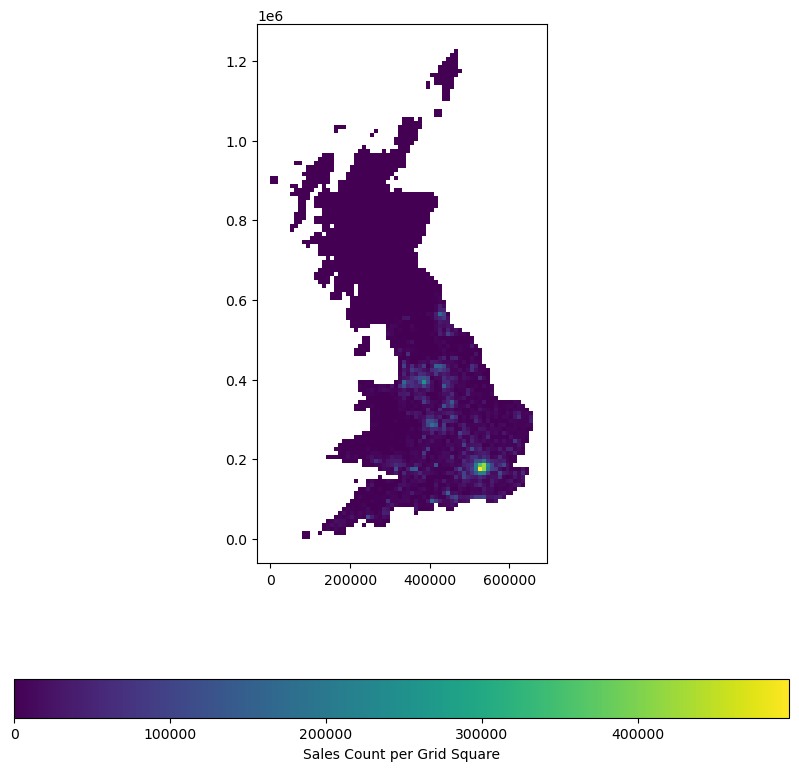

In [ ]:
# Merge the counts with the grid data
grid_with_counts = grid.merge(sales_counts_df, on='TILE_NAME', how='left')
grid_with_counts['count'].fillna(0, inplace=True)  # Replace NaNs with 0 for grid squares with no sales

# Plotting
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
grid_with_counts.plot(column='count', ax=ax, legend=True,
                      legend_kwds={'label': "Sales Count per Grid Square",
                                   'orientation': "horizontal"})
plt.show()

In [ ]:
average_prices = joined_df.groupby('TILE_NAME')['price'].mean()

# Convert this to a DataFrame
average_prices_df = average_prices.reset_index(name='average_price')
average_prices_df

,TILE_NAME,average_price
0,NT70,112194.851240
1,NT83,177376.628931
2,NT84,174042.262626
3,NT90,232110.059259
4,NT91,198318.181818
...,...,...
1692,TR37,161257.361920
1693,TR46,538349.389831
1694,TV49,205526.637539
1695,TV59,252832.406091


In [ ]:
# 'grid' is GeoDataFrame for the BNG grid dataset
grid_with_avg_prices = grid.merge(average_prices_df, on='TILE_NAME', how='left')
grid_with_avg_prices['average_price'].fillna(0, inplace=True)  # Replace NaNs with 0 for grids with no sales
grid_with_avg_prices

C:\Users\sardo\AppData\Local\Temp\ipykernel_16068\2688737506.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grid_with_avg_prices['average_price'].fillna(0, inplace=True)  # Replace NaNs with 0 for grids with no sales


,TILE_NAME,25K,ENGLAND,SCOTLAND,WALES,geometry,average_price
0,HP40,t,f,t,f,"POLYGON ((439999.999 1200000.003, 439999.999 1210000, 449999.996 1210000, 449999.996 1200000.003, 439999.999 1200000.003))",0.000000
1,HP50,t,f,t,f,"POLYGON ((449999.996 1200000.003, 449999.996 1210000, 460000.002 1210000, 460000.002 1200000.003, 449999.996 1200000.003))",0.000000
2,HP51,t,f,t,f,"POLYGON ((449999.996 1210000, 449999.996 1219999.998, 460000.002 1219999.998, 460000.002 1210000, 449999.996 1210000))",0.000000
3,HP60,t,f,t,f,"POLYGON ((460000.002 1200000.003, 460000.002 1210000, 470000 1210000, 470000 1200000.003, 460000.002 1200000.003))",0.000000
4,HP61,t,f,t,f,"POLYGON ((460000.002 1210000, 460000.002 1219999.998, 470000 1219999.998, 470000 1210000, 460000.002 1210000))",0.000000
...,...,...,...,...,...,...,...
2878,TR47,t,t,f,f,"POLYGON ((640000.001 169999.997, 640000.001 180000.005, 649999.998 180000.005, 649999.998 169999.997, 640000.001 169999.997))",0.000000
2879,TV49,t,t,f,f,"POLYGON ((540000 89999.997, 540000 100000.005, 549999.997 100000.005, 549999.997 89999.997, 540000 89999.997))",205526.637539
2880,TV59,t,t,f,f,"POLYGON ((549999.997 89999.997, 549999.997 100000.005, 560000.003 100000.005, 560000.003 89999.997, 549999.997 89999.997))",252832.406091
2881,TV69,t,t,f,f,"POLYGON ((560000.003 89999.997, 560000.003 100000.005, 570000.001 100000.005, 570000.001 89999.997, 560000.003 89999.997))",170247.427328


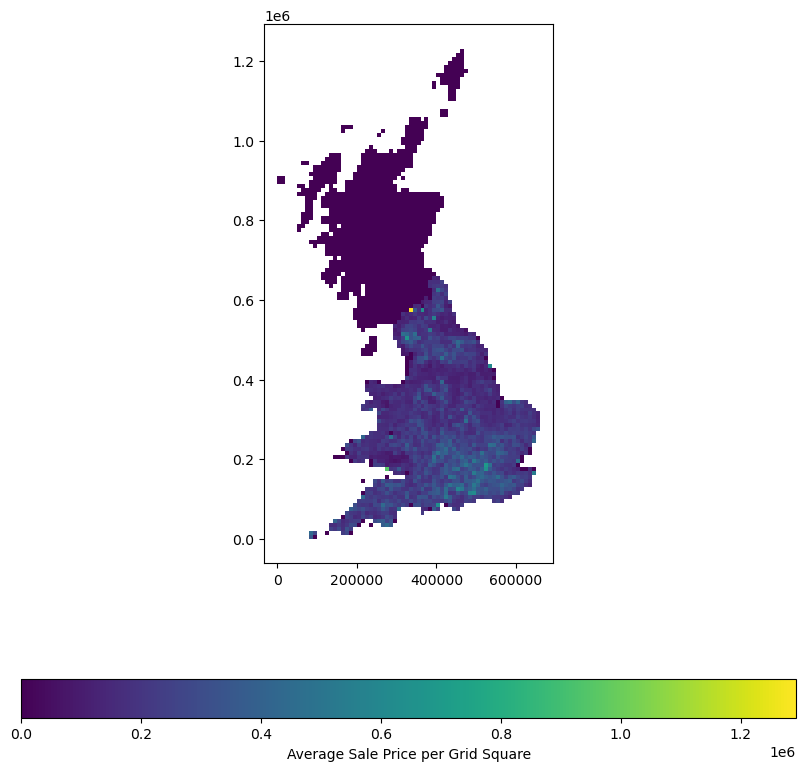

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
grid_with_avg_prices.plot(column='average_price', ax=ax, legend=True,
                          legend_kwds={'label': "Average Sale Price per Grid Square",
                                       'orientation': "horizontal"},
                          cmap='viridis')  # Using a color map that provides good visual differentiation
plt.show()

In [ ]:
# Filter tiles to show only the entries where TILE_NAME == 'ST65'
tiles_st65 = grid[grid['TILE_NAME'] == 'ST65']
tiles_st65['geometry']

2187    POLYGON ((360000.001 150000.002, 360000.001 160000, 369999.999 160000, 369999.999 150000.002, 360000.001 150000.002))
Name: geometry, dtype: geometry

In [ ]:
from shapely.geometry import Point, Polygon

# Define the polygon and point geometries
polygon_geom = Polygon([
    (360000.001, 150000.002),
    (360000.001, 160000),
    (369999.999, 160000),
    (369999.999, 150000.002),
    (360000.001, 150000.002)
])

point_geom = Point(368803.088, 155092.456)

# Create GeoDataFrames
gdf_polygon = gpd.GeoDataFrame([1], geometry=[polygon_geom], crs="EPSG:4326")
gdf_point = gpd.GeoDataFrame([1], geometry=[point_geom], crs="EPSG:4326")

# Check if the polygon contains the point
contains = gdf_polygon.contains(gdf_point.iloc[0].geometry)[0]

print(f"The polygon contains the point: {contains}")

The polygon contains the point: True


In [ ]:
gdf_polygon

,0,geometry
0,1,"POLYGON ((360000.001 150000.002, 360000.001 160000, 369999.999 160000, 369999.999 150000.002, 360000.001 150000.002))"


In [ ]:
gdf_point

,0,geometry
0,1,POINT (368803.088 155092.456)


In [ ]:
# Calculate the perimeter of the polygon
perimeter = gdf_polygon.length[0]

# Calculate the area of the polygon
area = gdf_polygon.area[0]

# Calculate the distance from the point to the polygon
distance = gdf_polygon.distance(gdf_point.iloc[0].geometry)[0]

print(f"Perimeter of the polygon: {perimeter}")
print(f"Area of the polygon: {area}")
print(f"Distance from the point to the polygon: {distance}")

Perimeter of the polygon: 39999.99200000003
Area of the polygon: 99999960.00000414
Distance from the point to the polygon: 0.0


C:\Users\sardo\AppData\Local\Temp\ipykernel_16068\2095239379.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  perimeter = gdf_polygon.length[0]
C:\Users\sardo\AppData\Local\Temp\ipykernel_16068\2095239379.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area = gdf_polygon.area[0]
C:\Users\sardo\AppData\Local\Temp\ipykernel_16068\2095239379.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distance = gdf_polygon.distance(gdf_point.iloc[0].geometry)[0]


In [ ]:
# Calculate the perimeter of the polygon in meters
perimeter_meters = gdf_polygon.length[0]

# Calculate the area of the polygon in square meters
area_sq_meters = gdf_polygon.area[0]

# Calculate the distance from the point to the polygon in meters
distance_meters = gdf_polygon.distance(gdf_point.iloc[0].geometry)[0]

# Convert meters to kilometers
perimeter_kilometers = perimeter_meters / 1000
area_sq_kilometers = area_sq_meters / 1e6  # 1 km² = 1,000,000 m²
distance_kilometers = distance_meters / 1000

print(f"Perimeter of the polygon: {perimeter_kilometers} km")
print(f"Area of the polygon: {area_sq_kilometers} km²")
print(f"Distance from the point to the polygon: {distance_kilometers} km")

Perimeter of the polygon: 39.99999200000003 km
Area of the polygon: 99.99996000000414 km²
Distance from the point to the polygon: 0.0 km


C:\Users\sardo\AppData\Local\Temp\ipykernel_16068\4161398321.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  perimeter_meters = gdf_polygon.length[0]
C:\Users\sardo\AppData\Local\Temp\ipykernel_16068\4161398321.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area_sq_meters = gdf_polygon.area[0]
C:\Users\sardo\AppData\Local\Temp\ipykernel_16068\4161398321.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distance_meters = gdf_polygon.distance(gdf_point.iloc[0].geometry)[0]


In [ ]:
# Increase the display width to show more characters
pd.set_option('display.max_colwidth', None)

In [ ]:
# Load BNG grid
# grid = gpd.read_file('path_to_BNG_grid.shp')

# Perform spatial join
# joined_data = gpd.sjoin(data_gdf, grid, how="inner", op='intersects')
# Perform spatial join to count the number of sales per tile
# Perform a spatial join to associate each sale with its corresponding 10km grid square
joined_gdf = gpd.sjoin(data_gdf, grid, how='inner', predicate='within')
joined_gdf
# Group by TILE_NAME to count properties per tile
# property_counts = joined_data.groupby('TILE_NAME').size()

,price,latitude,longitude,geometry,index_right,TILE_NAME,25K,ENGLAND,SCOTLAND,WALES
0,34950,51.2941,-2.4488,POINT (368803.088 155092.456),2187,ST65,t,t,f,f
1,133000,51.4412,-0.1984,POINT (525310.548 172895.438),2779,TQ27,t,t,f,f
2,83000,51.9602,1.3432,POINT (629788.272 234359.238),2727,TM23,t,t,f,f
3,59000,52.9599,0.0281,POINT (536326.083 342205.532),2535,TF34,t,t,f,f
4,51000,51.3856,0.5526,POINT (577715.053 168264.501),2828,TQ76,t,t,f,f
...,...,...,...,...,...,...,...,...,...,...
29212379,85000,53.5878,-2.2087,POINT (386282.099 410155.457),1377,SD81,t,t,f,f
29212380,60000,53.5791,-2.4254,POINT (371931.414 409251.473),1366,SD70,t,t,f,f
29212381,270000,53.4926,-2.5539,POINT (363348.542 399686.578),1632,SJ69,t,t,f,f
29212382,160000,53.5853,-2.6617,POINT (356292.391 410060.741),1347,SD51,t,t,f,f


In [ ]:
property_counts = joined_gdf.groupby('TILE_NAME').size()
property_counts

TILE_NAME
NT70      121
NT83      318
NT84      198
NT90      270
NT91       11
        ...  
TR37    23939
TR46       59
TV49    10517
TV59     8668
TV69    26881
Length: 1697, dtype: int64

In [ ]:
# Count the number of sales per grid square
sales_count = joined_gdf.groupby('TILE_NAME').size().reset_index(name='sales_count')
sales_count

,TILE_NAME,sales_count
0,NT70,121
1,NT83,318
2,NT84,198
3,NT90,270
4,NT91,11
...,...,...
1692,TR37,23939
1693,TR46,59
1694,TV49,10517
1695,TV59,8668


In [ ]:
# Merge the sales count back with the tiles GeoDataFrame
grid_df = grid.merge(sales_count, on='TILE_NAME', how='left')
grid_df['sales_count'] = grid_df['sales_count'].fillna(0)  # Fill NaN values with 0
grid_df

,TILE_NAME,25K,ENGLAND,SCOTLAND,WALES,geometry,sales_count
0,HP40,t,f,t,f,"POLYGON ((439999.999 1200000.003, 439999.999 1210000, 449999.996 1210000, 449999.996 1200000.003, 439999.999 1200000.003))",0.0
1,HP50,t,f,t,f,"POLYGON ((449999.996 1200000.003, 449999.996 1210000, 460000.002 1210000, 460000.002 1200000.003, 449999.996 1200000.003))",0.0
2,HP51,t,f,t,f,"POLYGON ((449999.996 1210000, 449999.996 1219999.998, 460000.002 1219999.998, 460000.002 1210000, 449999.996 1210000))",0.0
3,HP60,t,f,t,f,"POLYGON ((460000.002 1200000.003, 460000.002 1210000, 470000 1210000, 470000 1200000.003, 460000.002 1200000.003))",0.0
4,HP61,t,f,t,f,"POLYGON ((460000.002 1210000, 460000.002 1219999.998, 470000 1219999.998, 470000 1210000, 460000.002 1210000))",0.0
...,...,...,...,...,...,...,...
2878,TR47,t,t,f,f,"POLYGON ((640000.001 169999.997, 640000.001 180000.005, 649999.998 180000.005, 649999.998 169999.997, 640000.001 169999.997))",0.0
2879,TV49,t,t,f,f,"POLYGON ((540000 89999.997, 540000 100000.005, 549999.997 100000.005, 549999.997 89999.997, 540000 89999.997))",10517.0
2880,TV59,t,t,f,f,"POLYGON ((549999.997 89999.997, 549999.997 100000.005, 560000.003 100000.005, 560000.003 89999.997, 549999.997 89999.997))",8668.0
2881,TV69,t,t,f,f,"POLYGON ((560000.003 89999.997, 560000.003 100000.005, 570000.001 100000.005, 570000.001 89999.997, 560000.003 89999.997))",26881.0


Exercise 6. Using the BNG tiles and an appropriate scale, plot a map showing the number of sales per 10km grid square

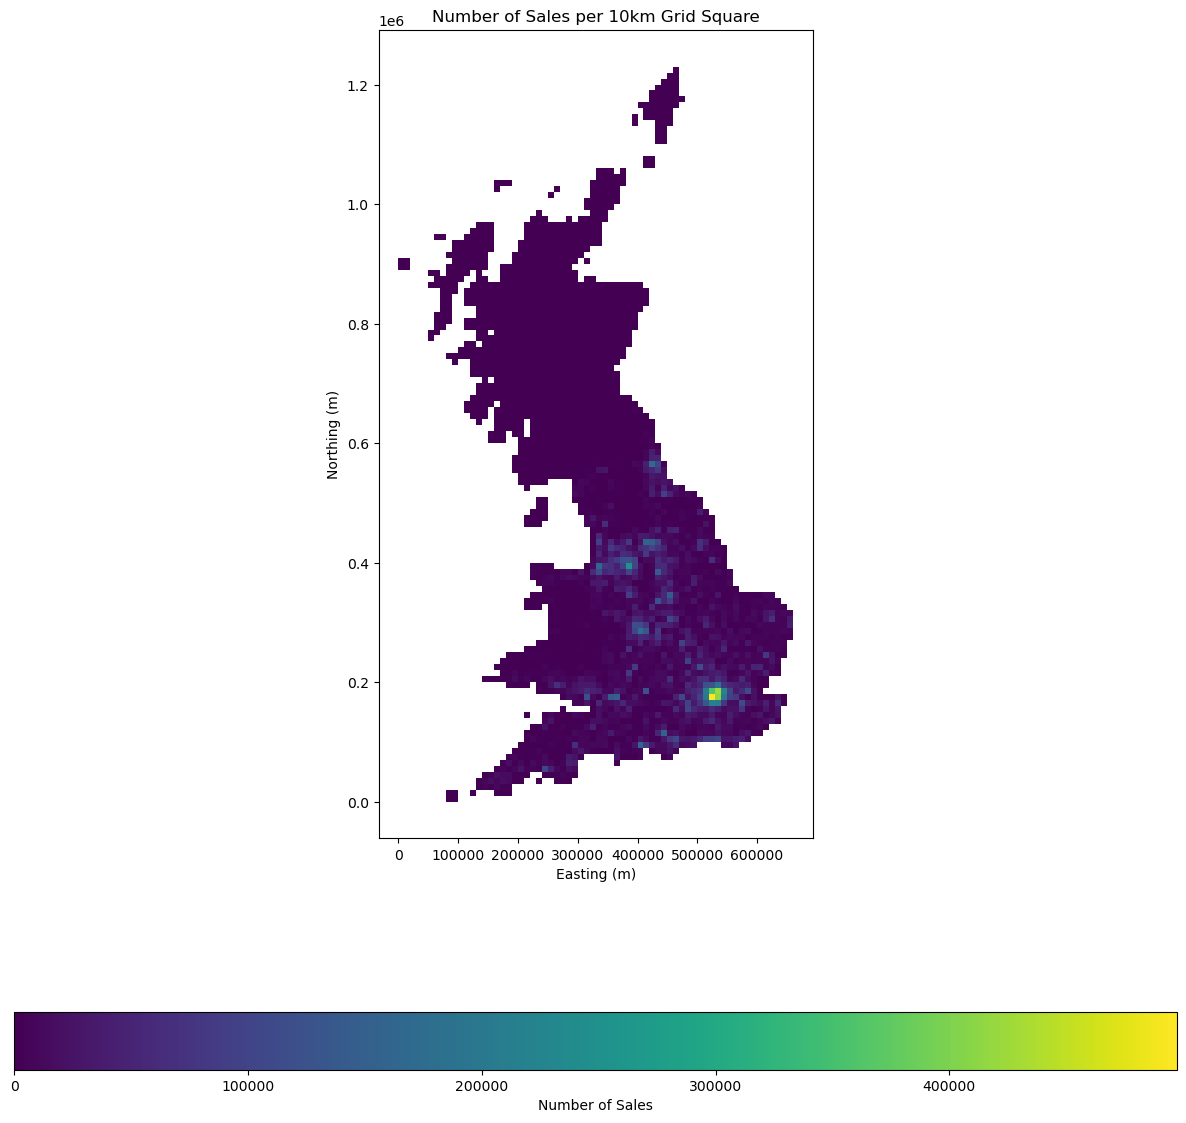

In [ ]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
grid_df.plot(column='sales_count', ax=ax, legend=True,
           legend_kwds={'label': "Number of Sales",
                        'orientation': "horizontal"})
plt.title('Number of Sales per 10km Grid Square')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.show()